# Telangana PDS Analytics
## Exploratory Data Analysis (EDA)

Comprehensive EDA covering data understanding, cleaning, univariate,
bivariate, multivariate, time-series analysis, outlier detection,
and insight generation before clustering.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

master_df = pd.read_csv('master_pds_dataset.csv')
master_df.shape

(499494, 56)

# 1. Data Understanding

In [2]:
master_df.info()
master_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499494 entries, 0 to 499493
Data columns (total 56 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   distCode                       499494 non-null  int64  
 1   distName_x                     499494 non-null  object 
 2   officeCode_x                   499494 non-null  int64  
 3   officeName_x                   499494 non-null  object 
 4   shopNo                         499494 non-null  int64  
 5   month                          499494 non-null  int64  
 6   year                           499494 non-null  int64  
 7   rcNfsaAay                      499494 non-null  int64  
 8   unitsNfsaAay                   499494 non-null  int64  
 9   rcNfsaPhh                      499494 non-null  int64  
 10  unitsNfsaPhh                   499494 non-null  int64  
 11  totalRcNfsa                    499494 non-null  int64  
 12  totalUnitsNfsa                

,distCode,officeCode_x,shopNo,month,year,rcNfsaAay,unitsNfsaAay,rcNfsaPhh,unitsNfsaPhh,totalRcNfsa,...,officeCode,longitude,latitude,utilization_ratio,total_rice,rice_wheat_ratio,portability_ratio,transaction_volatility,yearly_transaction_volatility,avg_monthly_transactions
count,499494.000000,499494.000000,4.994940e+05,499494.000000,499494.000000,499494.000000,499494.000000,499494.000000,499494.000000,499494.000000,...,495228.000000,494700.000000,494700.000000,499494.000000,499494.000000,499494.000000,499494.000000,499494.000000,498412.000000,499494.000000
mean,785.470242,785494.059294,2.920867e+06,5.897054,2023.759314,32.735755,91.321215,283.641391,1022.945267,316.377146,...,785721.434434,78.418347,17.641922,0.837087,9117.857133,7637.549271,0.282194,32.749367,1772.262290,445.198261
std,192.452634,192436.901439,9.345580e+05,3.457733,0.726624,22.656628,66.502817,160.534507,584.795895,167.183844,...,192383.187603,6.026730,1.552337,0.190139,5934.281332,4989.819275,0.275003,40.247093,1060.732063,265.929556
min,532.000000,532001.000000,1.407001e+06,1.000000,2023.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,532001.000000,0.000000,0.000000,0.000824,1.000000,0.057034,0.000000,0.000000,0.000000,8.000000
25%,539.000000,539012.000000,2.109033e+06,3.000000,2023.000000,19.000000,49.000000,174.000000,641.000000,202.000000,...,539021.000000,78.253855,17.171091,0.739130,5518.000000,4761.000000,0.054795,10.359903,1108.315388,277.758621
50%,926.000000,926012.000000,2.912003e+06,5.000000,2024.000000,28.000000,77.000000,251.000000,910.000000,285.000000,...,926012.000000,78.724470,17.622481,0.838449,7810.000000,7157.000000,0.157582,18.915224,1565.245348,390.448276
75%,934.000000,934023.000000,3.723021e+06,9.000000,2024.000000,40.000000,114.000000,358.000000,1263.000000,396.000000,...,934023.000000,79.499373,18.331638,0.932507,10855.000000,9863.000000,0.483006,39.686021,2157.130270,538.793103
max,982.000000,982012.000000,4.612012e+06,12.000000,2025.000000,276.000000,920.000000,2524.000000,10126.000000,2626.000000,...,982012.000000,81.263470,19.880502,4.192000,149655.000000,149655.000000,0.999147,1240.386850,19593.366462,5746.586207


In [3]:
print('Unique Shops:', master_df['shopNo'].nunique())
print('Unique Districts:', master_df['distName'].nunique())
print('Years:', master_df['year'].unique())
print('Months:', sorted(master_df['month'].unique()))

Unique Shops: 17491
Unique Districts: 33
Years: [2024 2023 2025]
Months: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12)]


# 2. Missing Values & Duplicates

In [4]:
master_df.isnull().sum().sort_values(ascending=False).head(20)

longitude                        4794
latitude                         4794
address                          4614
officeName                       4266
dateTime                         4266
distName                         4266
officeCode                       4266
fpsStatus                        4266
fpsType                          4266
yearly_transaction_volatility    1082
totalAmount                         0
sugar                               0
wheat                               0
riceAap                             0
riceFsc                             0
rgdal                               0
riceAfsc                            0
kerosene                            0
distCode                            0
salt                                0
dtype: int64

In [5]:
print('Duplicate Rows:', master_df.duplicated().sum())

Duplicate Rows: 0


# 3. Univariate Analysis

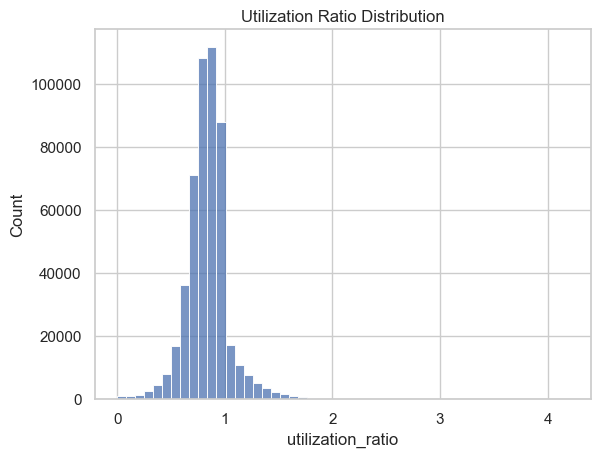

In [6]:
plt.figure()
sns.histplot(master_df['utilization_ratio'], bins=50)
plt.title('Utilization Ratio Distribution')
plt.show()

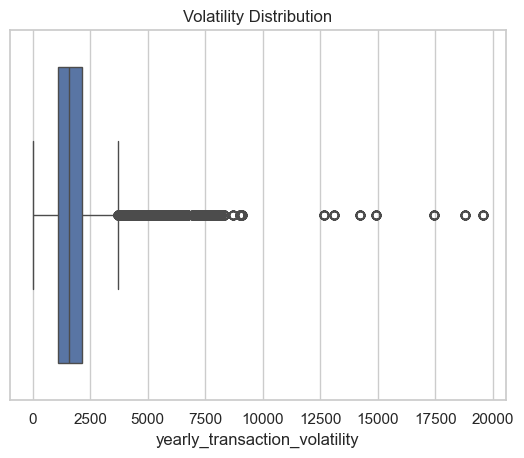

In [7]:
plt.figure()
sns.boxplot(x=master_df['yearly_transaction_volatility'])
plt.title('Volatility Distribution')
plt.show()

# 4. Bivariate Analysis

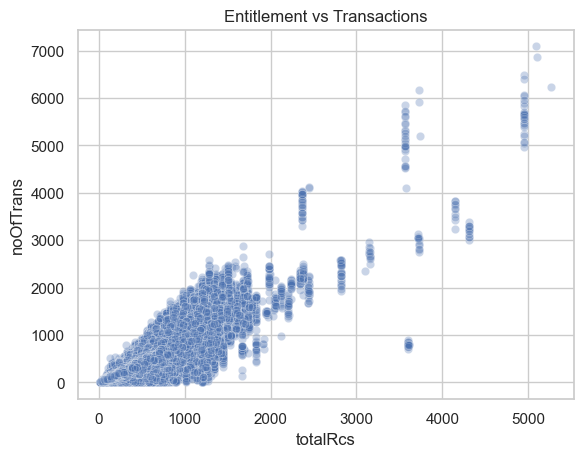

In [8]:
plt.figure()
sns.scatterplot(x='totalRcs', y='noOfTrans', data=master_df, alpha=0.3)
plt.title('Entitlement vs Transactions')
plt.show()

##### 🔥 Insight Statement

Transaction volume is strongly driven by entitlement size (r ≈ 0.88), indicating scale dependency. Therefore, clustering should focus on behavioral ratios rather than raw volume.

# 5. Multivariate Analysis

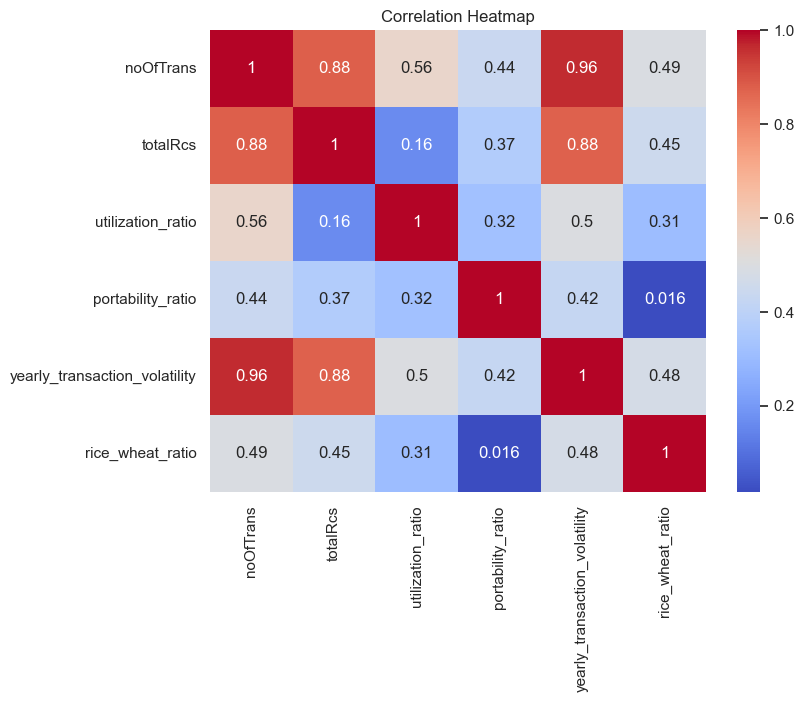

In [9]:
numeric_cols = [
    'noOfTrans', 'totalRcs', 'utilization_ratio',
    'portability_ratio', 'yearly_transaction_volatility',
    'rice_wheat_ratio'
]

plt.figure(figsize=(8,6))
sns.heatmap(master_df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 6. Time Series Analysis

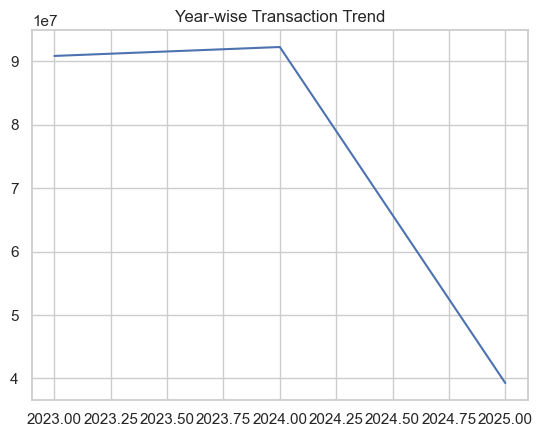

In [10]:
yearly_trans = master_df.groupby('year')['noOfTrans'].sum().reset_index()

plt.figure()
plt.plot(yearly_trans['year'], yearly_trans['noOfTrans'])
plt.title('Year-wise Transaction Trend')
plt.show()

2025 data is partial, causing artificial drop in yearly totals.

<Axes: xlabel='month', ylabel='noOfTrans'>

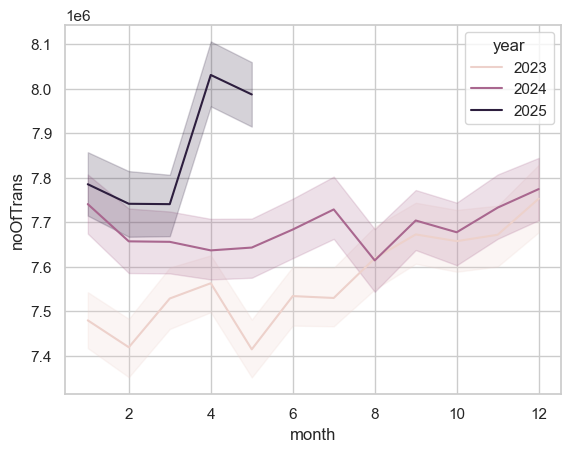

In [13]:
sns.lineplot(
    data=master_df,
    x="month",
    y="noOfTrans",
    hue="year",
    estimator="sum"
)

🔥 Insight

A consistent seasonal pattern is observed across all three years, with a notable spike in April and moderate dips around mid-year. Additionally, 2025 shows higher transaction activity compared to previous years, indicating increasing engagement or policy-driven expansion in PDS utilization.

Shop-level variability appears to reduce over time, suggesting operational stabilization.

# 7. Outlier Detection (IQR Method)

In [12]:
Q1 = master_df['utilization_ratio'].quantile(0.25)
Q3 = master_df['utilization_ratio'].quantile(0.75)
IQR = Q3 - Q1

outliers = master_df[(master_df['utilization_ratio'] < Q1 - 1.5*IQR) |
                     (master_df['utilization_ratio'] > Q3 + 1.5*IQR)]

print('Outlier Count:', len(outliers))

Outlier Count: 29451


# 8. Key Insights

- Utilization ratio centered around ~0.83
- ~10% shops exceed 100% utilization (possible portability hubs or anomalies)
- Strong correlation between transaction count and volatility
- Moderate relationship between portability and transaction count
- Volatility distribution heavily right-skewed



sns.scatterplot(
    x="utilization_ratio",
    y="portability_ratio",
    alpha=0.3,
    data=master_df
)
plt.title("Utilization vs Portability")
plt.show()